In [9]:
from annotate_images import annotate_coco_annotations, generate_distinct_colors, annotate_coco_annotations_2
font_path = 'ARIALBD.TTF'
import json
import numpy as np

In [10]:
dataset_dir = 'E:/datasets'
dataset_name = 'DOTA_dataset_512'
coco_dir = f'{dataset_dir}/{dataset_name}'
val_coco_file = f'{coco_dir}/val_coco.json'
train_coco_file = f'{coco_dir}/train_coco.json'
coco_file = f'{coco_dir}/YOLO_coco_results_annots.json'
sample_size = 10
threshold=None

In [11]:
with open(val_coco_file, 'r') as f:
    val_coco_data = json.load(f)

with open(coco_file, 'r') as f:
    train_coco_data = json.load(f)

coco_data = val_coco_data

In [12]:
val_category_map = {category['id']:category['name'] for category in val_coco_data['categories']}
train_category_map = {category['id']:category['name'] for category in train_coco_data['categories']}
for id, name in val_category_map.items():
    print(f'{id}:{name}')
for category_id in val_category_map.keys():
    assert val_category_map[category_id]==train_category_map[category_id], f'cats did not match {category_id}|{val_category_map[category_id]}!={train_category_map[category_id]}'

1:small-vehicle
2:large-vehicle
3:ship
4:harbor
5:baseball-diamond
6:soccer-ball-field
7:ground-track-field
8:swimming-pool
9:roundabout
10:tennis-court
11:basketball-court
12:plane
13:helicopter
14:bridge
15:storage-tank
16:container-crane


In [13]:
category_ids = [category['id'] for category in coco_data['categories']]
category_map = {category['id']:category['name'] for category in coco_data['categories']}
color_increment = np.floor(255/len(category_ids))
color_map = {}
color_val = 0
gen_colors = generate_distinct_colors(len(category_ids))
for ind, (id, name) in enumerate(category_map.items()):
    #color_map[id] = int(color_val)
    color_map[id] = gen_colors[ind]
    print(f'{id}|{name}|{gen_colors[ind]}')
    #color_val+=color_increment



1|small-vehicle|(0, 0, 0, 255)
2|large-vehicle|(0, 0, 127, 255)
3|ship|(0, 0, 255, 255)
4|harbor|(0, 127, 0, 255)
5|baseball-diamond|(0, 127, 127, 255)
6|soccer-ball-field|(0, 127, 255, 255)
7|ground-track-field|(0, 255, 0, 255)
8|swimming-pool|(0, 255, 127, 255)
9|roundabout|(0, 255, 255, 255)
10|tennis-court|(127, 0, 0, 255)
11|basketball-court|(127, 0, 127, 255)
12|plane|(127, 0, 255, 255)
13|helicopter|(127, 127, 0, 255)
14|bridge|(127, 127, 127, 255)
15|storage-tank|(127, 127, 255, 255)
16|container-crane|(127, 255, 0, 255)


In [14]:
'''Seems 2X slower for bboxes but supports segmentation
imgs, img_ids, img_names=annotate_coco_annotations_2(coco_file, mode='bbox', img_root=None, sample_size=sample_size, 
                                                    colors_map=color_map,font_path=font_path,
                                                   font_size=20, category_map=category_map, 
                                                   seed=None, thickness=2)
#'''

"Seems 2X slower for bboxes but supports segmentation\nimgs, img_ids, img_names=annotate_coco_annotations_2(coco_file, mode='bbox', img_root=None, sample_size=sample_size, \n                                                    colors_map=color_map,font_path=font_path,\n                                                   font_size=20, category_map=category_map, \n                                                   seed=None, thickness=2)\n#"

In [15]:
#'''
imgs, img_ids, img_names=annotate_coco_annotations(coco_file, img_root=None, sample_size=sample_size, 
                                                   threshold=threshold, colors_map=color_map,font_path=font_path,
                                                   font_size=10, category_map=None, 
                                                   seed=None, thickness=2)
#'''

using labels
1|small-vehicle
2|large-vehicle
3|ship
4|harbor
5|baseball-diamond
6|soccer-ball-field
7|ground-track-field
8|swimming-pool
9|roundabout
10|tennis-court
11|basketball-court
12|plane
13|helicopter
14|bridge
15|storage-tank
16|container-crane


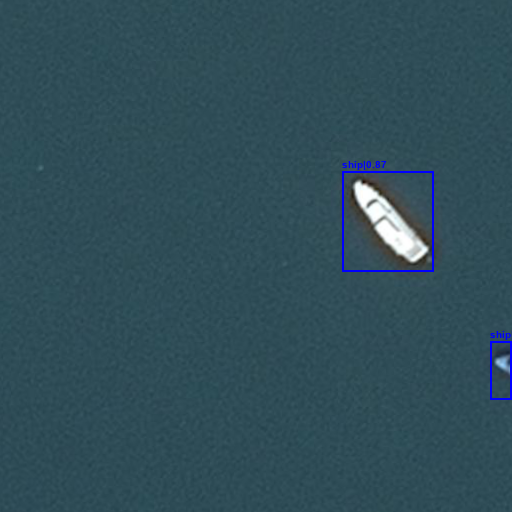

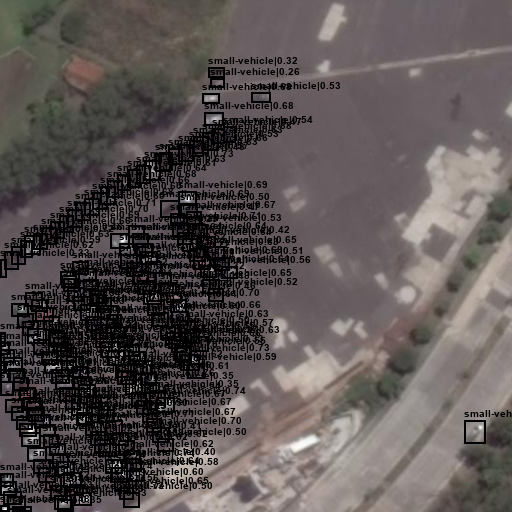

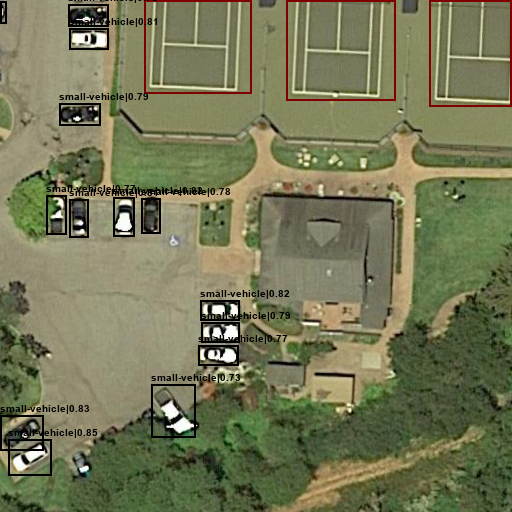

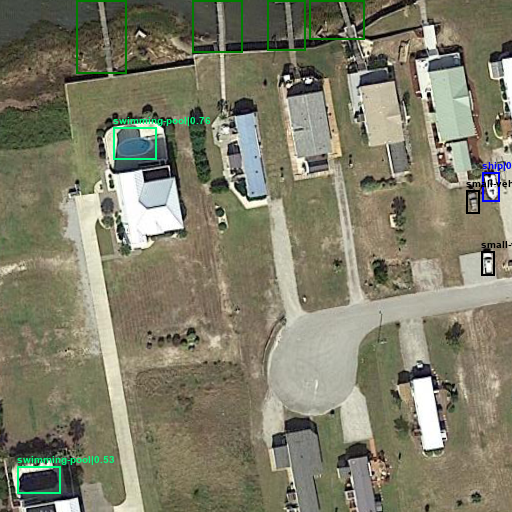

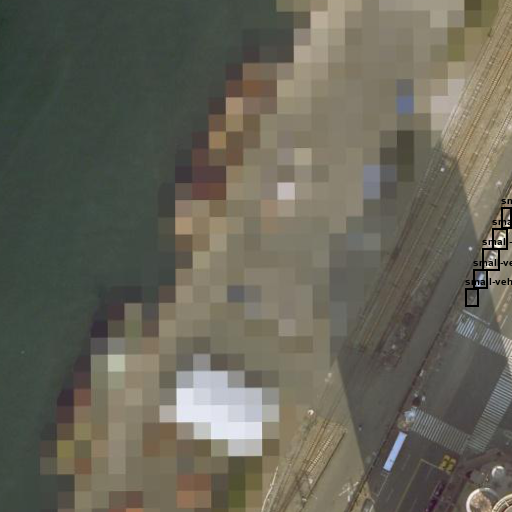

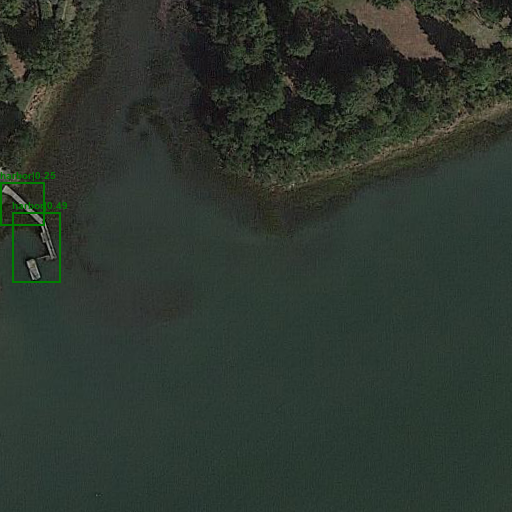

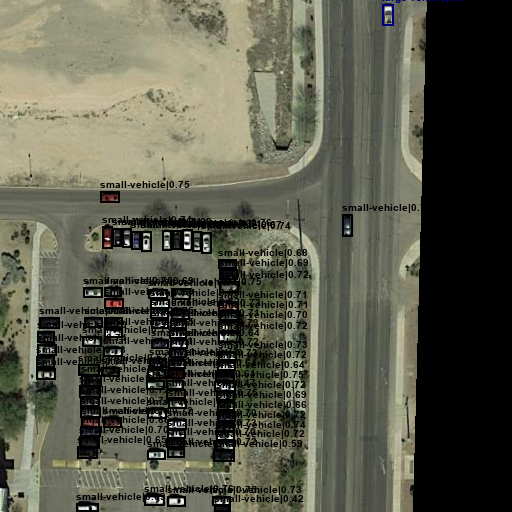

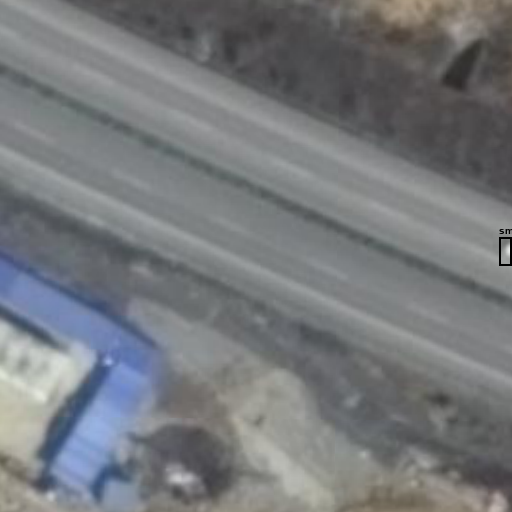

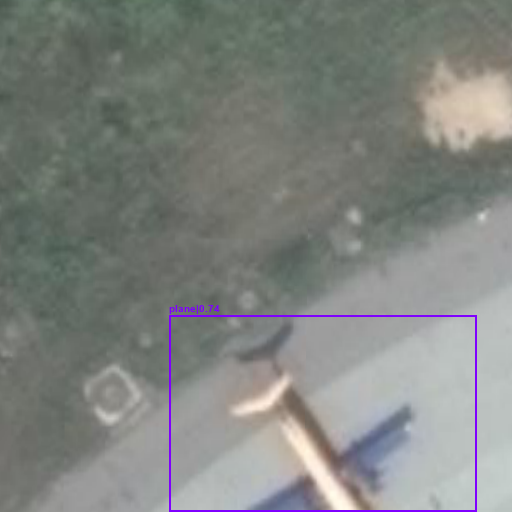

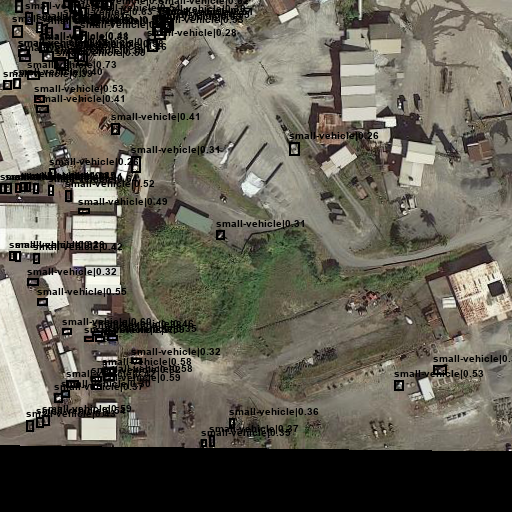

In [16]:
for img in imgs:
    display(img)